In [1]:

# import  Pkg
using Random, Distributions
using Integrals, Cubature
# using Optimization, OptimizationMOI, OptimizationOptimJL, DifferentiationInterface, Ipopt
# using ForwardDiff, ModelingToolkit
using Distributed
using Printf

import Plots as pl
import LinearAlgebra as la
import DataFrames as df
import CSV as csv
################################################################################


In [5]:
### 6 algorithms, Policy with K=10 arms, Poisson


include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Poisson/eTS_alg_file_poisson.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Poisson/e_const_TS_alg_file_poisson.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Poisson/eTS_finiteDecay_alg_file_poisson.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Poisson/e_third_TS_alg_file_poisson.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Poisson/thompson_sampling_alg_file_poisson.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Poisson/TS_decay_greedy_knownT_alg_file_poisson.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Poisson/TS_decay_greedy_knownT_1_eps_poisson_alg_file.jl")
################################################################################
# set_printoptions(precision=2,suppress=True)

hz = 10000 #int(input("Enter the horizon : "))
num_models = 1000
horizon = 1:hz

# tot_seed_vals = 500
# seed_values = 1:tot_seed_vals 

tot_seed_vals = 1
seed_values = 1:tot_seed_vals 

 #int(input("Enter the #models : "))#4
num_arms = 10 #int(input("Enter the #arms : "))

# alg_names_to_run = ["TS_decay_greedy_knownT"] #,,[""] # # #,"TS_decay_greedy_knownT","eTS_finiteDecay_tT2_alg"]
# alg_names_to_run = ["thom_samp_alg","TS_decay_greedy_knownT"] #,,[""] # # #,"TS_decay_greedy_knownT","eTS_finiteDecay_tT2_alg"]
# alg_names_to_run = ["TS_decay_greedy_knownT"]#,"thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg" ]#
model_chosen_to_run = [i for i in 1:num_models] #[i for i in 1:100 if (i != 70 && !(i in 22:40))]
# model_chosen_to_run = 71:100 #1000 #[30,32,38,39]
alg_names_to_run = [TS_decay_greedy_knownT_1_eps,thom_samp_alg]
# model_chosen_to_run = [1]

folder_name = "horizon_"*string(hz)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_models_"*string(length(model_chosen_to_run))*"_t_T_2_rate"
mkpath(folder_name)

for alg_name in alg_names_to_run
    mkpath(folder_name*"/"*string(alg_name))
end
# file_name_with_path = "horizon_""_arms_""_seed_""_models_"**"/
model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        model[1,:] = [1   0.7 0.7 0.7 0.7  0.7 0.7 0.7 0.7 0.7]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end

hor_names = [string(i) for i in 1:hz]

for generic in alg_names_to_run #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    regret_generic_model = zeros((num_models,hz))
    regret_seed_generic_model_list = Float64[]
    @time begin
        for model_chosen in model_chosen_to_run 

            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            p_max = maximum(arms)
            data_generic = zeros((tot_seed_vals,hz))
            regret_every_step_generic = zeros((1,hz))
            regret_seed = zeros((tot_seed_vals,hz))
            times_sampled_avg = zeros(num_arms)

            for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                seed = model_chosen
                # @show data_generic[count,:]
            
                (data_generic[count,:]) = generic(model[model_chosen,:,:],seed,hz)
                rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]

           
                regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                regret_generic_model[model_chosen,:] .+= regret_seed[count,:]/tot_seed_vals
                # times_sampled_avg .+= times_sampled
                # @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                
            #     time_taken[count] = time.process_time() 
            end
            @printf "%s %d %0.2f \n" "model:" model_chosen sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
          
        end
        print(string(generic)*" Regret avg. over models = ")
        @printf "%0.2f \n" sum(regret_generic_model[:,hz])/length(model_chosen_to_run)

        # regret_df = df.DataFrame(round.(sum(regret_generic_model,dims=1)/length(model_chosen_to_run),sigdigits=4),hor_names)
        regret_df = df.DataFrame(round.(regret_generic_model,sigdigits=4),hor_names)
        # print(regret_df)
        csv_file_name  = folder_name*"/"*string(generic)*"/regret_"*string(generic)*"_models_"*string(length(model_chosen_to_run))*"_t_T_2_rate"*".csv"
        csv.write(csv_file_name, regret_df)
    end
end


model: 1 -53.00 
model: 2 229.21 
model: 3 183.04 
model: 4 690.26 
model: 5 301.01 
model: 6 151.98 
model: 7 238.60 
model: 8 176.12 
model: 9 -7.92 
model: 10 179.34 
model: 11 64.31 
model: 12 24.67 
model: 13 129.61 
model: 14 108.44 
model: 15 251.07 
model: 16 161.49 
model: 17 49.00 
model: 18 119.24 
model: 19 142.52 
model: 20 164.20 
model: 21 238.91 
model: 22 28.15 
model: 23 204.25 
model: 24 1253.36 
model: 25 190.13 
model: 26 372.91 
model: 27 146.78 
model: 28 172.94 
model: 29 106.37 
model: 30 71.30 
model: 31 185.78 
model: 32 140.93 
model: 33 -76.97 
model: 34 4.64 
model: 35 15.02 
model: 36 155.24 
model: 37 227.75 
model: 38 133.25 
model: 39 204.01 
model: 40 120.12 
model: 41 155.19 
model: 42 159.69 
model: 43 204.45 
model: 44 3.23 
model: 45 -15.10 
model: 46 279.54 
model: 47 28.47 
model: 48 147.34 
model: 49 223.49 
model: 50 97.64 
model: 51 183.74 
model: 52 -23.03 
model: 53 69.65 
model: 54 289.15 
model: 55 142.08 
model: 56 77.65 
model: 57 0.07 

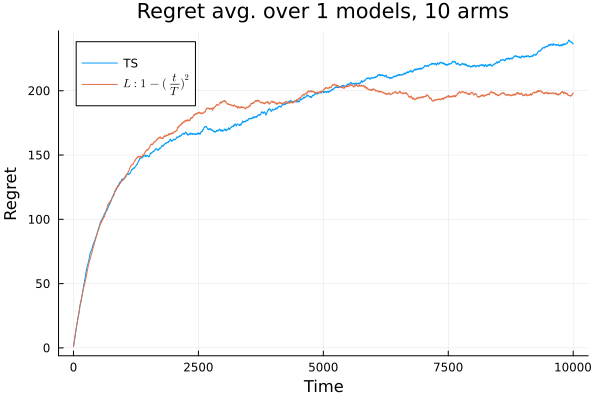

In [8]:
import Plots as pl
using LaTeXStrings

regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting averaged over models
for model in model_chosen_to_run
 
    regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[model],dims=1)[:]/tot_seed_vals
    # regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[model],dims=1)[:]/tot_seed_vals
    # regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[model],dims=1)[:]/tot_seed_vals
    # regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[model],dims=1)[:]/tot_seed_vals
    # regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[model],dims=1)[:]/tot_seed_vals
    regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[model],dims=1)[:]/tot_seed_vals
end

num_models = length(model_chosen_to_run)
list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models regret_e_const_TS/num_models regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models regret_TS_decay_greedy_knownT/num_models]
pic = pl.plot(horizon,list_of_all_alg_regrets) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
# list_of_all_alg_regrets = [regret_TS/num_models  regret_TS_decay_greedy_knownT/num_models]
# list_of_all_labels = ["TS"  L"L:1-(\frac{t}{T})^2"]
# pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
pl.title!("Regret avg. over "*string(num_models)*" models, "*string(num_arms)*" arms")
display(pic)
# pl.savefig("regret_model_"*string(num_models)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*"_t_T_2_rate.pdf")
